In [163]:
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [164]:
#load data and label
data,label=datasets.load_digits(return_X_y=True);
print(data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [165]:
#pre-processing
data = preprocessing.MinMaxScaler().fit_transform(data)
label=label.reshape(len(label),1)

#classes included in dataset
labels = [0,1,2,3,4,5,6,7,8,9]

In [166]:
print(data)
print(data.shape)
print(label.shape)

[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]
(1797, 64)
(1797, 1)


In [167]:
#split dataset
x_train, x_test, y_train, y_test = train_test_split(data, label,test_size=0.2, random_state=0, shuffle=True)

In [168]:
#set learning rate, minibatch size and epoches, initialize weights and bias
lb=preprocessing.LabelBinarizer()                     #one-hot function
lb.fit([0,1,2,3,4,5,6,7,8,9])
np.random.seed(0)
minibatch_size=64
l=0.1
epochs=1000
w = np.random.uniform(-1,1,[data.shape[1],64])        #10 neurons for hidden layer
b = np.zeros([1,64])                                  #number of bias equal to number of neurons in hidden layer
w2 = np.random.uniform(-1,1,[64,10])                  #10 output neurons for 10 classes
b2 = np.zeros([1,10])

In [169]:
#relu function
def ReLu(v):
    return np.maximum(0,v)

In [170]:
#derivative of relu funtion
def ReLu_derivative(v):
    return np.where(v<=0,0,1)

In [171]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

In [172]:
def sigmoid_derivative(v):
    return sigmoid(v)*(1-sigmoid(v))

In [173]:
def tanh(v):
    return (np.exp(v)-np.exp(-v))/(np.exp(v)+np.exp(-v))

In [174]:
def tanh_derivative(v):
    return 1-np.power(tanh(v),2)

In [175]:
def LReLU(x):
    return np.where(x > 0, x, x * 0.01)

In [176]:
def dLReLU(x):
    return np.where(x > 0, 1, 0.01)

In [177]:
#softmax funtion
def softmax(X):
    exps = np.exp(X)
    return exps / np.sum(exps)

In [178]:
#function to convert softmax output to single label
def convert(arr):
    arr_size = arr.shape[1]
    arr_max = np.argmax(arr, axis=1)
    return arr_max

Final Error:  0.10057035006044526
Final Accuracy:  0.9722222222222222


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:102: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


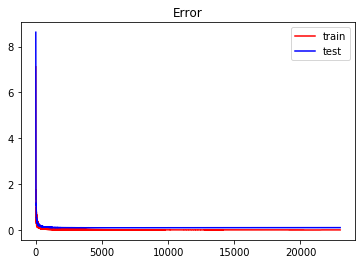

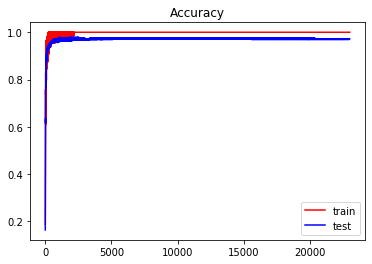

In [179]:
#variables for storing error and accuracy results
train_E = []
test_E = []
test_Acc = []
train_Acc = []

#epoch split
for epoch in range(epochs):
    
    #minibatch split
    for i in range(0,x_train.shape[0],minibatch_size):
        x_mini=x_train[i:i+minibatch_size,:]
        y_mini=y_train[i:i+minibatch_size,:]
        
        #forward pass
        in_=x_mini@w+b
        out1=LReLU(in_)
        in2=out1@w2+b2
        out2=np.zeros([x_mini.shape[0],10])
        for j in range(x_mini.shape[0]):
            out2[j,:]=softmax(in2[j,:])
        
        #one-hot label
        oh_label=lb.transform(y_mini)
        
        #training error
        train_error=metrics.log_loss(y_mini,out2,labels=labels)
        train_E.append(train_error)
        
        #test error
        inTE=(LReLU(x_test@w+b)@w2)+b2
        outTE=np.zeros([x_test.shape[0],10])
        for j in range(x_test.shape[0]):
            outTE[j,:]=softmax(inTE[j,:])
        test_error=metrics.log_loss(y_test,outTE,labels=labels)
        test_E.append(test_error)
        
        
        #training accuracy
        trainacc=convert(out2)
        trainacc=metrics.accuracy_score(y_mini,trainacc)
        train_Acc.append(trainacc)
        
        #test accuracy
        in22=(LReLU(x_test@w+b)@w2)+b2
        out22=np.zeros([x_test.shape[0],10])
        for j in range(x_test.shape[0]):
            out22[j,:]=softmax(in22[j,:])
        act=convert(out22)
        score=metrics.accuracy_score(y_test,act)
        test_Acc.append(score)
        
        #Back propergation layer2
        dEdIn2=np.zeros([x_mini.shape[0],10]) 
        for j in range(x_mini.shape[0]):
            dEdIn2[j,:]=out2[j,:]-oh_label[j,:]
        dIn2_dW2 = out1
        dEdW2 = (1/x_mini.shape[0])*out1.T@dEdIn2
        dEdB2 = (1/x_mini.shape[0])*np.ones([1,len(x_mini)])@dEdIn2
        
        #update layer2's weights and bias
        w2 -= l*dEdW2
        b2 -= l*dEdB2

        #Back propergation layer1
        dEdOut1 = dEdIn2 @ w2.T
        dOut1dIn1 = dLReLU(in_)
        dEdIn1 = dEdOut1*dOut1dIn1
        dIn1dW = x_mini
        dEdW = (1/x_mini.shape[0])*dIn1dW.T@((dEdIn2@w2.T)*dOut1dIn1)
        dEdB = (1/x_mini.shape[0])*np.ones([len(x_mini)])@((dEdIn2@w2.T)*dOut1dIn1)
        
        #update layer1's weights and bias
        w -= l*dEdW
        b -= l*dEdB

#calculate final error and accuracy
in22=(LReLU(x_test@w+b)@w2)+b2
out22=np.zeros([x_test.shape[0],10])
for j in range(x_test.shape[0]):
    out22[j,:]=softmax(in22[j,:])
act=convert(out22)
err_score=metrics.log_loss(y_test,out22,labels=labels)
acc_score=metrics.accuracy_score(y_test,act)
print('Final Error: ', err_score)
print('Final Accuracy: ', acc_score)  

#plot error figure
f1=plt.figure(1)
plt.plot(train_E,label="train",color='red')
plt.plot(test_E,label="test",color='blue')
plt.legend(loc='best')
plt.title('Error')
f1.show()

#plot accuracy figure
f2=plt.figure(2)
plt.plot(train_Acc,label="train",color='red')
plt.plot(test_Acc,label="test",color='blue')
plt.legend(loc='best')
plt.title('Accuracy')
f2.show()